In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [129]:
#df, dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/salary.csv')

### **Data Understanding**

In [130]:
print("Initial Dataset")
print(f"Number of Row : {df.shape[0]}")
print(f"Number of Column : {df.shape[1]}")

Initial Dataset
Number of Row : 32561
Number of Column : 15


In [131]:
# display the first few rows of the DataFrame and column names
print("Data Preview:")
df.head()

Data Preview:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [132]:
df.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [133]:
# check the labels in the categorical features

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [134]:
# get the simple summary statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### **Data Cleaning**

Remove extra space & delete row that contain missing value

In [135]:
# strip leading/trailing spaces from all elements in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replace common placeholders for empty values with NaN
df.replace(['', ' ', '?'], np.nan, inplace=True)

# drop rows with any empty values
df_modified = df.dropna(how='any')

# save the modified DataFrame to a new CSV file
modified_file_path = '/content/drive/MyDrive/Colab Notebooks/AI/salary_modified.csv'
df_modified.to_csv(modified_file_path, index=False)

<ipython-input-135-ba2103ef2d4e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [136]:
print("Modified Dataset")
print(f"Number of Row : {df_modified.shape[0]}")
print(f"Number of Column : {df_modified.shape[1]}")

Modified Dataset
Number of Row : 30162
Number of Column : 15


Check duplicated entry contained inside the dataset

In [137]:
#if duplicate, return true value
duplicate = df[df.duplicated()]

print(f'Number of duplicate entries: {df.duplicated().sum()}')

print("Duplicate Rows :")

duplicate.head()

Number of duplicate entries: 24
Duplicate Rows :


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


Delete duplicated entry

In [138]:
# keep="first", drop duplicate except first occurence
df_cleaned = df_modified.drop_duplicates(keep='first')
print(f'Number of duplicate entries: {df_modified.duplicated().sum()}')

Number of duplicate entries: 23


In [139]:
print("Cleaned Dataset")
print(f"Number of Row : {df_cleaned.shape[0]}")
print(f"Number of Column : {df_cleaned.shape[1]}")

Cleaned Dataset
Number of Row : 30139
Number of Column : 15


In [140]:
# save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/AI/salary_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

In [141]:
# check the labels in the categorical features

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

In [142]:
df = df_cleaned
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [143]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### **Data Splitting**

In [144]:
from sklearn.model_selection import train_test_split

# define X and y values
X = df.drop(columns="salary")
y = df["salary"]

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape) #only salary column
print("Y Test:", y_test.shape)

X Train: (24111, 14)
X Test: (6028, 14)
Y Train: (24111,)
Y Test: (6028,)


In [145]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2489,54,Private,240542,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,48,United-States
4887,33,Federal-gov,159548,Assoc-acdm,12,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States
5969,32,Private,162604,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,40,United-States
29494,39,State-gov,142897,Assoc-voc,11,Never-married,Exec-managerial,Unmarried,White,Female,0,0,50,United-States
30392,19,State-gov,261422,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States


In [146]:
y_train

,salary
2489,<=50K
4887,<=50K
5969,<=50K
29494,<=50K
30392,<=50K
...,...
32194,<=50K
5877,<=50K
935,>50K
17063,>50K


### **Data Visualisation**

#### Age vs Salary

In [147]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for age vs salary in the training set
pd.crosstab(train_data['age'], train_data['salary'])

salary,<=50K,>50K
age,,
17,272,0
18,350,0
19,459,1
20,506,0
21,482,3
...,...,...
83,3,1
84,5,1
86,1,0


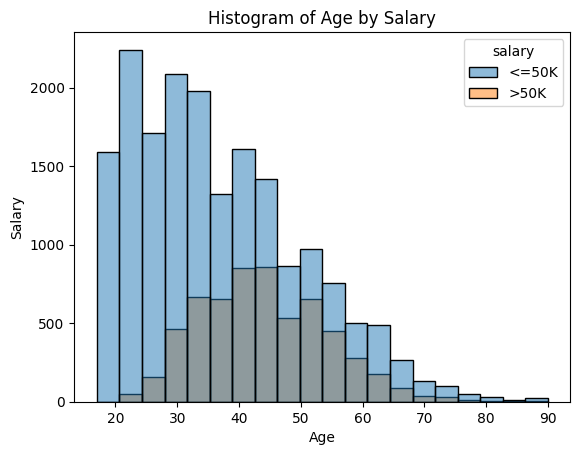

In [148]:
# histograms for age vs salary
sns.histplot(data=train_data, x='age', hue='salary', bins=20, element="bars")

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Histogram of Age by Salary')
plt.show()

#### Workclass vs Salary

In [149]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for workclass vs salary in the training set
pd.crosstab(train_data['workclass'], train_data['salary'])

salary,<=50K,>50K
workclass,,
Federal-gov,443,293
Local-gov,1179,485
Private,13944,3875
Self-emp-inc,381,464
Self-emp-not-inc,1425,571
State-gov,763,275
Without-pay,13,0


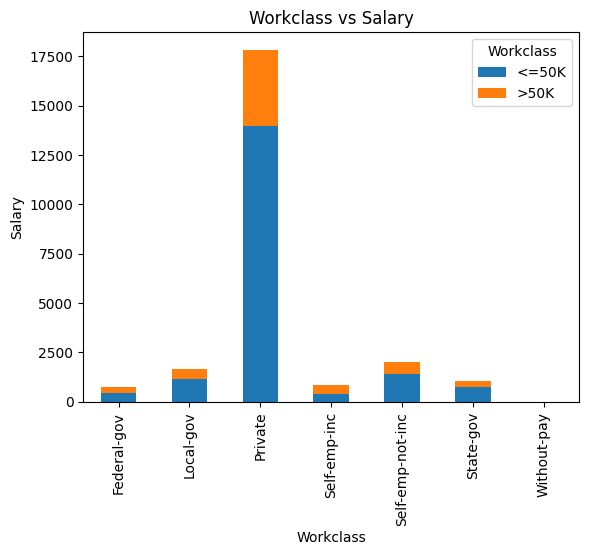

In [150]:
# create a crosstab for workclass vs salary in the training set
crosstab_data = pd.crosstab(train_data['workclass'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Workclass')
plt.ylabel('Salary')
plt.title('Workclass vs Salary')
plt.legend(title='Workclass')
plt.show()

#### Education vs Salary

In [151]:
# education level in ascending order
education_level = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college',
    'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

# convert the 'education' column to a categorical type with the specified order
train_data['education'] = pd.Categorical(train_data['education'], categories=education_level, ordered=True)

# create a crosstab for education vs salary in the training set
pd.crosstab(train_data['education'], train_data['salary'])

salary,<=50K,>50K
education,,
Preschool,36,0
1st-4th,124,3
5th-6th,216,9
7th-8th,412,29
9th,355,22
10th,626,48
11th,796,51
12th,278,21
HS-grad,6535,1272


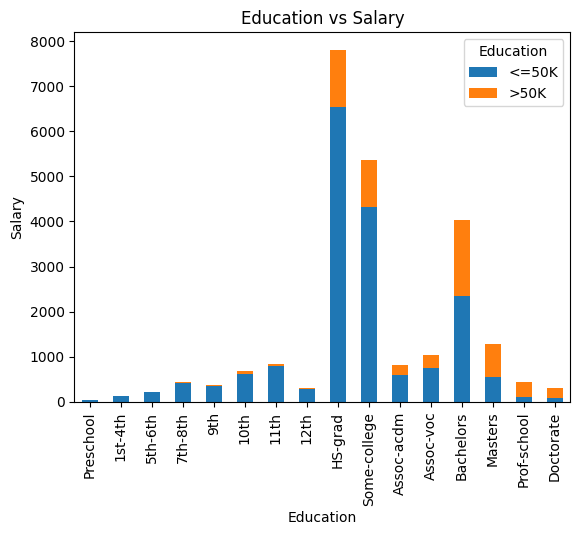

In [152]:
# create a crosstab for education vs salary in the training set
crosstab_data = pd.crosstab(train_data['education'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Education vs Salary')
plt.legend(title='Education')
plt.show()

#### Marital-Status vs Salary

In [153]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for marital-status vs salary in the training set
pd.crosstab(train_data['marital-status'], train_data['salary'])

salary,<=50K,>50K
marital-status,,
Divorced,3027,353
Married-AF-spouse,8,6
Married-civ-spouse,6177,5077
Married-spouse-absent,276,29
Never-married,7347,370
Separated,719,62
Widowed,594,66


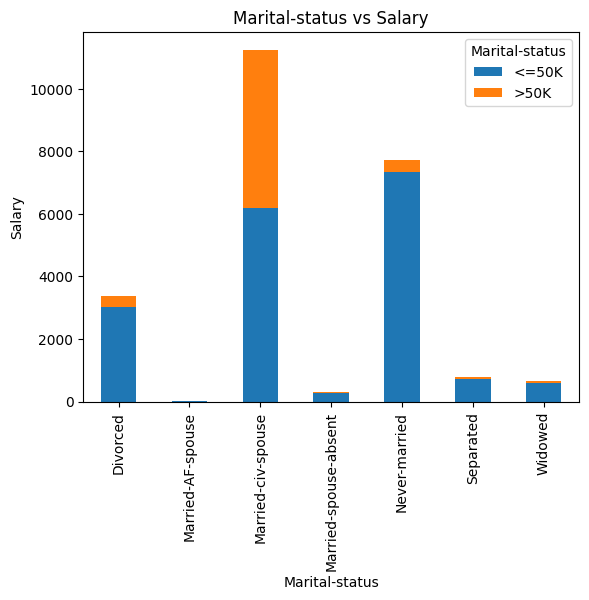

In [154]:
# create a crosstab for marital-status vs salary in the training set
crosstab_data = pd.crosstab(train_data['marital-status'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Marital-status')
plt.ylabel('Salary')
plt.title('Marital-status vs Salary')
plt.legend(title='Marital-status')
plt.show()

#### Occupation vs Salary

In [155]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for occupation vs salary in the training set
pd.crosstab(train_data['occupation'], train_data['salary'])

salary,<=50K,>50K
occupation,,
Adm-clerical,2561,406
Armed-Forces,7,1
Craft-repair,2513,702
Exec-managerial,1663,1535
Farming-fishing,699,90
Handlers-cleaners,1024,72
Machine-op-inspct,1392,189
Other-service,2469,111
Priv-house-serv,117,1


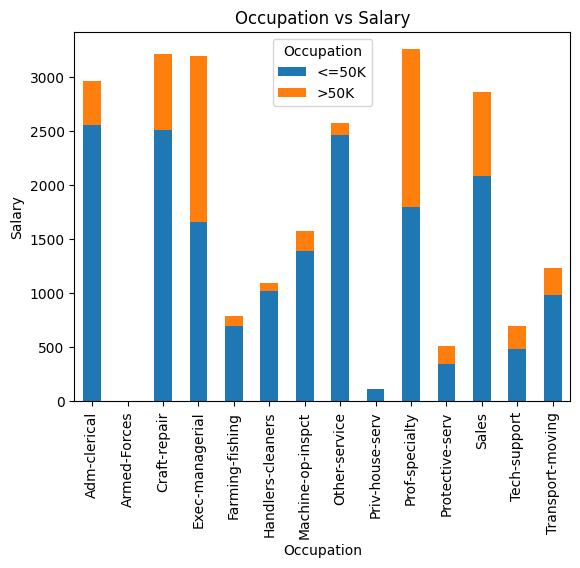

In [156]:
# create a crosstab for occupation vs salary in the training set
crosstab_data = pd.crosstab(train_data['occupation'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Salary')
plt.title('Occupation vs Salary')
plt.legend(title='Occupation')
plt.show()

#### Relationship vs Salary

In [157]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for relationship vs salary in the training set
pd.crosstab(train_data['relationship'], train_data['salary'])

salary,<=50K,>50K
relationship,,
Husband,5469,4487
Not-in-family,5496,649
Other-relative,677,28
Own-child,3509,57
Unmarried,2425,178
Wife,572,564


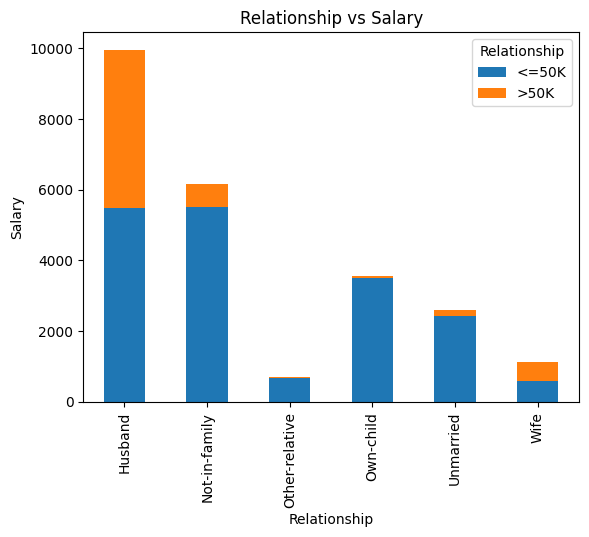

In [158]:
# create a crosstab for relationship vs salary in the training set
crosstab_data = pd.crosstab(train_data['relationship'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Relationship')
plt.ylabel('Salary')
plt.title('Relationship vs Salary')
plt.legend(title='Relationship')
plt.show()

#### Race vs Salary

In [159]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for race vs salary in the training set
pd.crosstab(train_data['race'], train_data['salary'])

salary,<=50K,>50K
race,,
Amer-Indian-Eskimo,200,30
Asian-Pac-Islander,532,202
Black,1984,288
Other,168,16
White,15264,5427


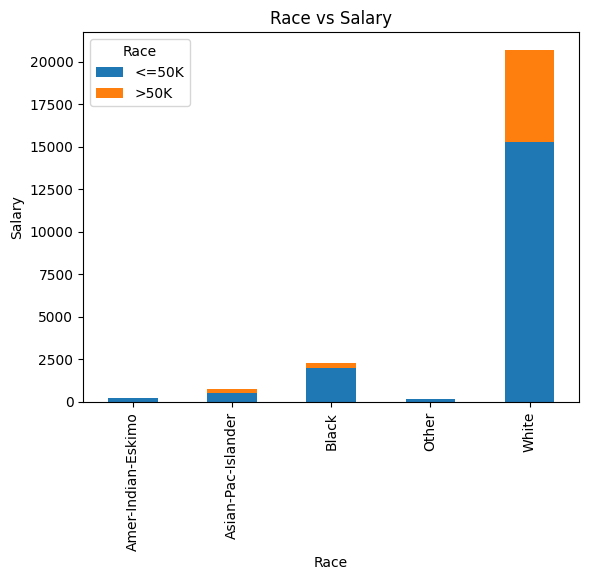

In [160]:
# create a crosstab for race vs salary in the training set
crosstab_data = pd.crosstab(train_data['race'], train_data['salary'])

# plotting the crosstab data using a bar chart
crosstab_data.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Salary')
plt.title('Race vs Salary')
plt.legend(title='Race')
plt.show()

#### Sex vs Salary

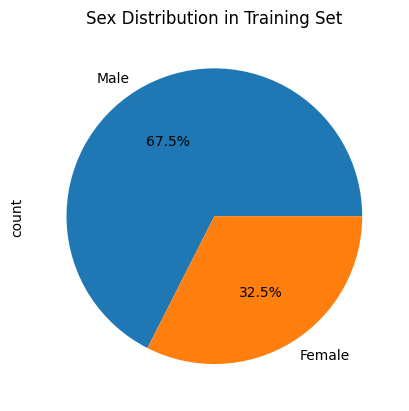

In [161]:
# create a DataFrame combining 'sex' from X_train and 'salary' from y_train
train_data = pd.concat([X_train['sex'], y_train], axis=1)

# plot the pie chart with percentage labels and shadow using the training data
train_data['sex'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Sex Distribution in Training Set')
plt.show()

#### Hours-per-week vs Salary

In [162]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for hours-per-week vs salary in the training set
pd.crosstab(train_data['hours-per-week'], train_data['salary'])

salary,<=50K,>50K
hours-per-week,,
1,4,1
2,11,0
3,20,1
4,14,2
5,26,5
...,...,...
95,0,1
96,3,1
97,1,1


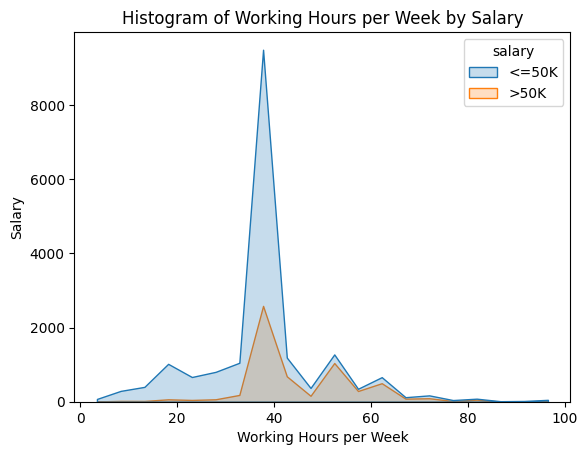

In [163]:
# histograms for hours-per-week vs salary
sns.histplot(data=train_data, x='hours-per-week', hue='salary', bins=20, element="poly")

plt.xlabel('Working Hours per Week')
plt.ylabel('Salary')
plt.title('Histogram of Working Hours per Week by Salary')
plt.show()

#### Native-Country vs Salary

In [164]:
# use df_cleaned dataframe to filter
USA = df_cleaned[df['native-country'] == 'United-States']
NonUSA = df_cleaned[df['native-country'] != 'United-States']

print('USA', USA.shape)
print('NonUSA', NonUSA.shape)

USA (27487, 15)
NonUSA (2652, 15)


In [165]:
# concat X_train and y_train to create a DataFrame for the training set
train_data = pd.concat([X_train, y_train], axis=1)

# create a crosstab for race vs salary in the training set
pd.crosstab(train_data['native-country'], train_data['salary'])

salary,<=50K,>50K
native-country,,
Cambodia,9,6
Canada,58,25
China,39,17
Columbia,41,2
Cuba,56,23
Dominican-Republic,56,2
Ecuador,19,3
El-Salvador,74,7
England,38,25


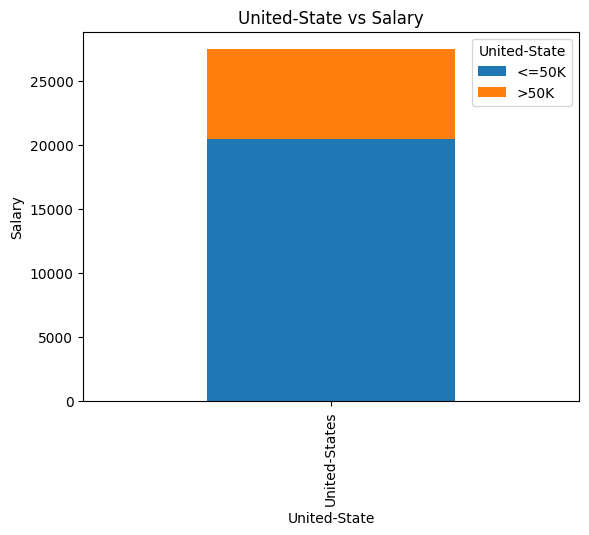

In [166]:
# create crosstabs for USA
crosstab_usa = pd.crosstab(USA['native-country'], USA['salary'])

# USA plot
crosstab_usa.plot(kind='bar', stacked=True)

plt.xlabel('United-State')
plt.ylabel('Salary')
plt.title('United-State vs Salary')
plt.legend(title='United-State')
plt.show()

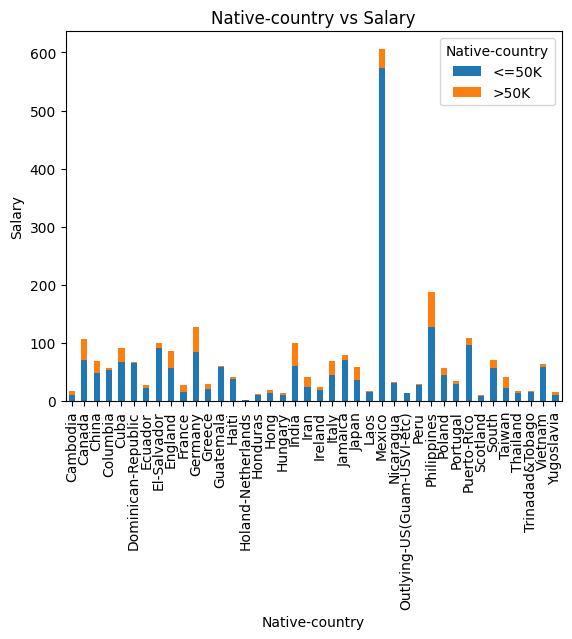

In [167]:
# create crosstabs for NonUSA
crosstab_nonusa = pd.crosstab(NonUSA['native-country'], NonUSA['salary'])

# NonUSA plot
crosstab_nonusa.plot(kind='bar', stacked=True)
plt.xlabel('Native-country')
plt.ylabel('Salary')
plt.title('Native-country vs Salary')
plt.legend(title='Native-country')
plt.show()

### **Encode**

In [168]:
# one hot encode, for object class, result will only have 1 & 0
from sklearn.preprocessing import OneHotEncoder

# extract categorial columns from df
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# create one hot encoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fit encoder on X_train and transform X_train and X_test data
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# create a new dataframe with the encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# drop categorial_columns from X_train and X_test
X_train_numeric = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test_numeric = X_test.drop(columns=categorical_columns).reset_index(drop=True)

# concat numeric columns with the one-hot encoded categorical columns
X_train = pd.concat([X_train_numeric, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test_numeric, X_test_encoded_df], axis=1)

X_train.columns.to_list()
X_test.columns.to_list()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fi

In [169]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,54,240542,10,0,0,48,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33,159548,12,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,162604,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,39,142897,11,0,0,50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19,261422,10,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24106,42,455553,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24107,37,323155,2,0,0,85,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24108,37,176900,9,0,0,99,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24109,49,124672,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,31,210008,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33,161745,11,0,0,45,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,22,378104,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38,51838,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,37,126708,9,0,0,60,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,31,163303,11,0,0,38,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6024,42,211253,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6025,24,189148,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6026,36,192443,10,13550,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **Features Scaling**

In [171]:
# normalization
# subtract each entry by the mean value of the whole data, divide the results by the difference between the minimum and the maximum value
# only for numeric data
from sklearn.preprocessing import Normalizer

# drop rows with NaN values
X_train_clean = X_train.dropna()
X_test_clean = X_test.dropna()


# select only numeric value from df_clean
numeric_columns = ['age','education-num','capital-gain','capital-loss','hours-per-week']
X_train_numeric = X_train_clean[numeric_columns]
X_test_numeric = X_test_clean[numeric_columns]

# normalization
scaler = Normalizer()

# fit encoder on X_train and transform X_train and X_test data
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Create new df with scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns)

# concat scaled numeric columns with non-numeric columns
X_train_non_numeric = X_train.drop(columns=numeric_columns).reset_index(drop=True)
X_test_non_numeric = X_test.drop(columns=numeric_columns).reset_index(drop=True)

X_train = pd.concat([X_train_non_numeric, X_train_scaled_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_non_numeric, X_test_scaled_df.reset_index(drop=True)], axis=1)

X_train.columns.to_list()
X_test.columns.to_list()

['fnlwgt',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occ

In [172]:
X_train

,fnlwgt,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,education-num,capital-gain,capital-loss,hours-per-week
0,240542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.740351,0.137102,0.0,0.0,0.658090
1,159548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.619999,0.225454,0.0,0.0,0.751513
2,162604,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.615271,0.173045,0.0,0.0,0.769089
3,142897,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.605982,0.170918,0.0,0.0,0.776900
4,261422,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.418518,0.220273,0.0,0.0,0.881091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24106,455553,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.715574,0.153337,0.0,0.0,0.681499
24107,323155,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.399028,0.021569,0.0,0.0,0.916685
24108,176900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.348824,0.084849,0.0,0.0,0.933339
24109,124672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.766937,0.140866,0.0,0.0,0.626071


In [173]:
X_test

,fnlwgt,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,education-num,capital-gain,capital-loss,hours-per-week
0,210008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.603108,0.175096,0.000000,0.0,0.778204
1,161745,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.580199,0.193400,0.000000,0.0,0.791180
2,378104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.472818,0.193425,0.000000,0.0,0.859669
3,51838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.679765,0.160997,0.000000,0.0,0.715542
4,126708,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.520662,0.126648,0.000000,0.0,0.844317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,163303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.616801,0.218865,0.000000,0.0,0.756079
6024,211253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.706606,0.218711,0.000000,0.0,0.672958
6025,189148,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.503066,0.209611,0.000000,0.0,0.838444
6026,192443,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.002657,0.000738,0.999992,0.0,0.002952


### **Train & Predict Model**

#### K-Nearest Neighbor (KNN)

In [174]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # Using k=3 as an example

# train the model on the training set
neigh.fit(X_train,y_train)

# apply the model to the test set
y_pred_knn = neigh.predict(X_test)
y_pred_knn

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

#### Support Vector Machine (SVM)

In [175]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

# train the model
svc.fit(X_train,y_train)

# take the model that was trained on the X_train data and apply it to the X_test
y_pred_svm = svc.predict(X_test)
y_pred_svm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

#### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=10, random_state=42)

# train the model
forest.fit(X_train,y_train)

# take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_rf = forest.predict(X_test)
y_pred_rf

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

#### Naive Bayes

In [177]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

# train the model
nb.fit(X_train,y_train)

# take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_nb = nb.predict(X_test)
y_pred_nb

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

#### Decision Tree

In [178]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()

# train the model
tree.fit(X_train, y_train)

# take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_dt = tree.predict(X_test)
y_pred_dt

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '>50K'],
      dtype=object)

### **Evaluation** - Accuracy Measurement

#### K-Nearest Neighbor (KNN)

In [179]:
from sklearn.metrics import accuracy_score

knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for KNN: %.2f" % knn)

Accuracy score for KNN: 0.69


Accuracy: 0.69
Precision: 0.351
Recall: 0.25
F1 Score: 0.292


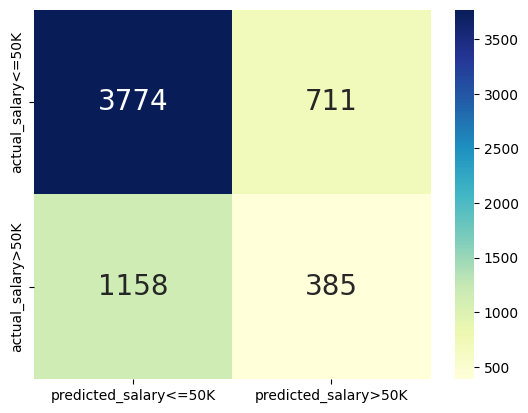

In [180]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, xticklabels = ['predicted_salary<=50K', 'predicted_salary>50K'],
            yticklabels=['actual_salary<=50K', 'actual_salary>50K'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# extract value
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]


accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) != 0 else 0
recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) != 0 else 0
f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Support Vector Machine (SVM)

In [181]:
from sklearn.metrics import accuracy_score

svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy score for SVM: %.2f" % svm)

Accuracy score for SVM: 0.74


Accuracy: 0.744
Precision: 0
Recall: 0.0
F1 Score: 0


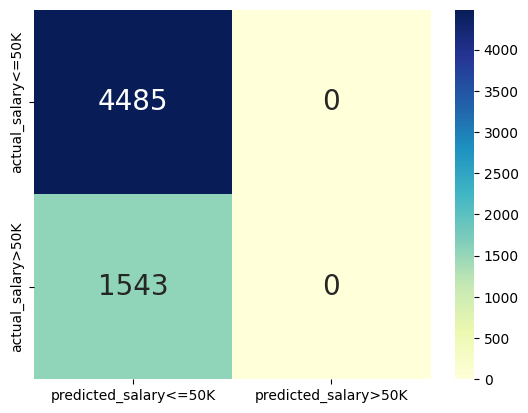

In [182]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, xticklabels = ['predicted_salary<=50K', 'predicted_salary>50K'],
            yticklabels=['actual_salary<=50K', 'actual_salary>50K'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# extract value
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]


accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) != 0 else 0
recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) != 0 else 0
f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Random Forest

In [183]:
from sklearn.metrics import accuracy_score

rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score for Random Forest: %.2f" % rf)

Accuracy score for Random Forest: 0.85


Accuracy: 0.847
Precision: 0.823
Recall: 0.515
F1 Score: 0.634


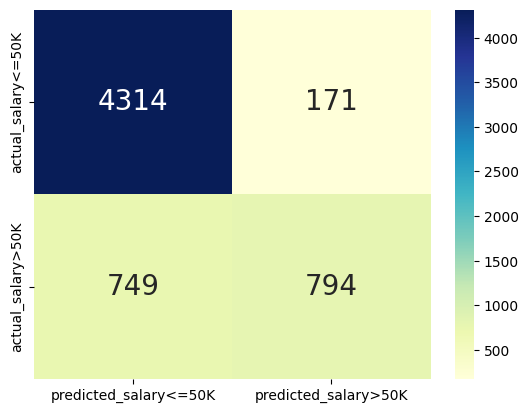

In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, xticklabels = ['predicted_salary<=50K', 'predicted_salary>50K'],
            yticklabels=['actual_salary<=50K', 'actual_salary>50K'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# extract value
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]


accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) != 0 else 0
recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) != 0 else 0
f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Naive Bayes

In [185]:
from sklearn.metrics import accuracy_score

nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy score for Naive Bayes: %.2f" % nb)

Accuracy score for Naive Bayes: 0.81


Accuracy: 0.812
Precision: 0.61
Recall: 0.733
F1 Score: 0.666


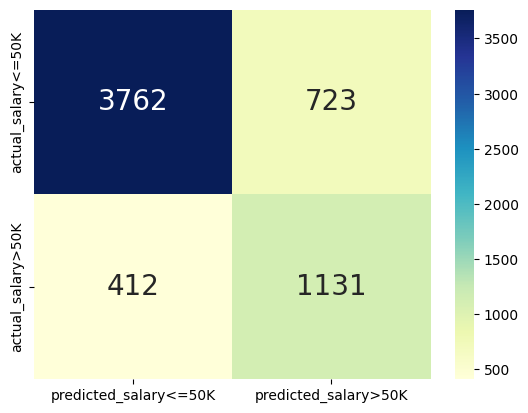

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, xticklabels = ['predicted_salary<=50K', 'predicted_salary>50K'],
            yticklabels=['actual_salary<=50K', 'actual_salary>50K'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# extract value
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]


accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) != 0 else 0
recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) != 0 else 0
f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Decision Tree

In [187]:
from sklearn.metrics import accuracy_score

dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy score for Decision Tree: %.2f" % dt)

Accuracy score for Decision Tree: 0.81


Accuracy: 0.806
Precision: 0.619
Recall: 0.627
F1 Score: 0.623


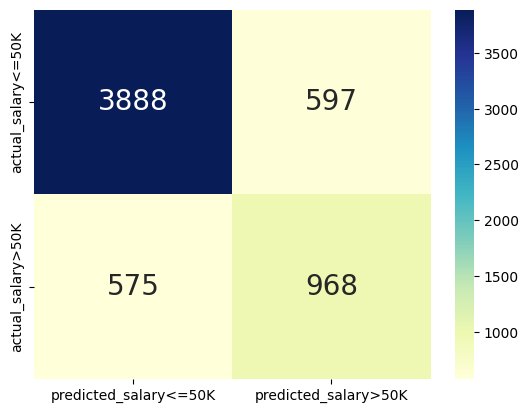

In [188]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, xticklabels = ['predicted_salary<=50K', 'predicted_salary>50K'],
            yticklabels=['actual_salary<=50K', 'actual_salary>50K'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# extract value
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]


accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) != 0 else 0
recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) != 0 else 0
f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

## Save To Joblib

In [189]:
import joblib

# Save models with their respective names
joblib.dump(knn, 'K-NearestNeighbor.joblib')
joblib.dump(svm, 'SupportVectorMachine.joblib')
joblib.dump(rf, 'RandomForest.joblib')
joblib.dump(nb, 'NaiveBayes.joblib')
joblib.dump(dt, 'DecisionTree.joblib')

# Optionally save the KNN model as salary_prediction_model.joblib for consistency
joblib.dump(knn, 'salary_prediction_model.joblib')  # Save KNN as salary_prediction_model.joblib


['DecisionTree.joblib']